# Tarefa da disciplina Ciência de Dados

### Criar um exemplo para utilizar o algoritmo k-NN (k-vizinhos mais próximos)

1. usar a biblioteca scikit-learn
2. usar a banco de dados iris

In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install -U scikit-learn

In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from pandas import DataFrame, read_csv

## Para testar o método vou usar o banco de dados iris

### 1 pelo próprio Scikitlearn - datasets

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Célula com os códigos.

In [6]:
iris = load_iris(as_frame=True)
iris_df = iris.data
x = iris.data[['sepal length (cm)','sepal width (cm)']]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)

In [12]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Essa é a etapa da normalização do conjunto escolhido: 

#### serão usados:

1. preprocessing: StandardScaler
2. pipeline: Pipeline
3. neighboors: KNeighborsClassifier

* Essé é apenas a etapa de definição para normalizar dados posteriormente.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[('scaler',StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=11))]
)

## última etapa - algoritmo de decisão divido em 2:

1. com a saída uniforme
2. com a saída em distância

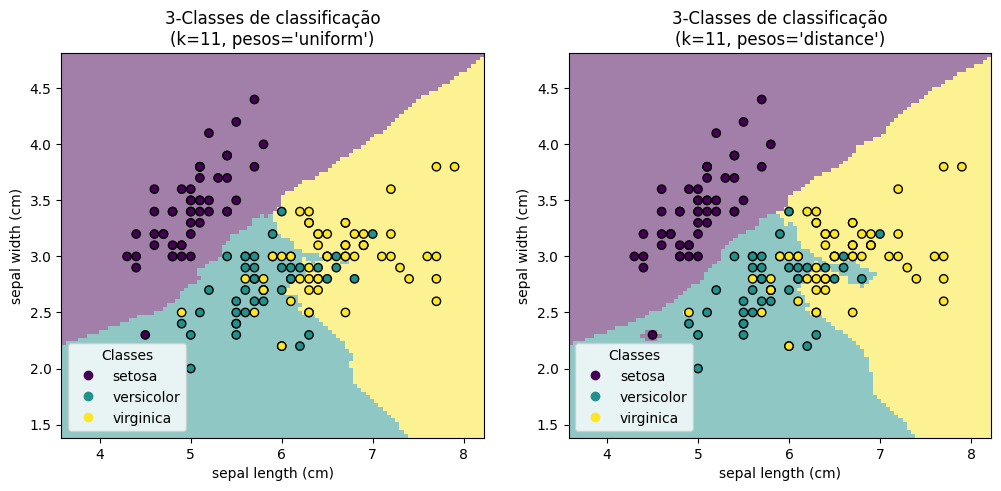

In [11]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12,5))

for ax, weights in zip(axs,('uniform','distance')):
    clf.set_params(knn__weights=weights).fit(x_train,y_train)
    disp= DecisionBoundaryDisplay.from_estimator(
        clf,
        x_test,
        response_method = 'predict',
        plot_method = 'pcolormesh',
        xlabel = iris.feature_names[0],
        ylabel = iris.feature_names[1],
        shading = 'auto',
        alpha = 0.5,
        ax = ax,
    )
    scatter = disp.ax_.scatter(x.iloc[:,0],x.iloc[:, 1],c=y, edgecolors='k')
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc='lower left',
        title='Classes',
    )
    _ = disp.ax_.set_title(
        f'3-Classes de classificação\n(k={clf[-1].n_neighbors}, pesos={weights!r})'
    )
plt.show()    